# Assignment 03 – Case Study 01

### 1. Load the dataset

In [112]:

# 1. Load the dataset in Python environment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# The loan prediction dataset is loaded into the Python environment using pandas.
# Load dataset
df = pd.read_csv('train_loan.csv')

# Display first few rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [113]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### 2. Preprocessing Steps

### a. Missing value handling

In [114]:
# In this dataset, categorical variables contain
# missing values which are replaced using the mode, as it represents the most
# frequent category. Numerical variables are filled using the median

# Check missing values
df.isnull().sum()


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [115]:

# Fill categorical missing values with mode
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)



In [116]:
# Fill numerical missing values with median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Verify missing values handled
df.isnull().sum()



,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


### b. Outlier detection

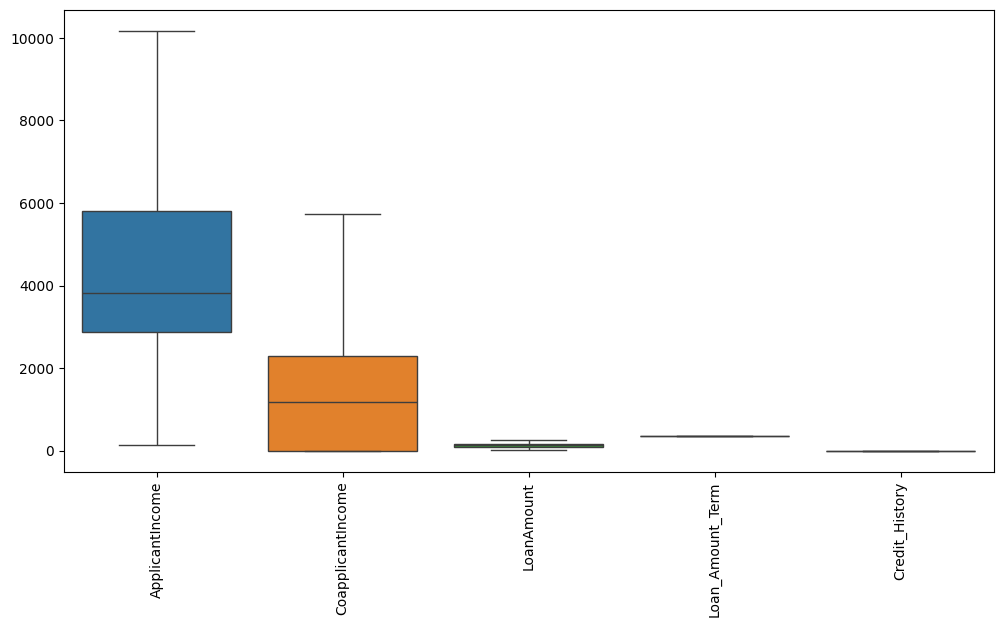

In [117]:
# Outliers are extreme values that deviate significantly from other observations.
# The Interquartile Range (IQR) method is used to detect outliers.

# Using IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Boxplot after outlier treatment
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.show()



### c. Encoding

In [118]:
# Machine learning models require numerical input. Categorical variables are
# encoded using appropriate techniques. Binary variables such as Gender, Married,
# Education, and Loan_Status are label encoded. The Dependents variable is ordinal
# and is converted into numerical order. Property_Area is a nominal variable and
# is one-hot encoded. Loan_ID is dropped as it is only an identifier and does not
# contribute to prediction.


df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})


df['Dependents'] = df['Dependents'].replace({'0': 0, '1': 1, '2': 2, '3+': 3})
df['Dependents'] = df['Dependents'].astype(int)
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})

df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True,dtype = int)



In [119]:

# Encoded dataset preview
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,1,0,5849.0,0.0,128.0,360.0,1.0,1,0,1
1,LP001003,1,1,1,1,0,4583.0,1508.0,128.0,360.0,1.0,0,0,0
2,LP001005,1,1,0,1,1,3000.0,0.0,66.0,360.0,1.0,1,0,1
3,LP001006,1,1,0,0,0,2583.0,2358.0,120.0,360.0,1.0,1,0,1
4,LP001008,1,0,0,1,0,6000.0,0.0,141.0,360.0,1.0,1,0,1


In [120]:
# This is an identifier, not a feature

df.drop('Loan_ID', axis=1, inplace=True)


### d. Scaling

In [121]:
# Feature scaling is used to bring numerical variables to a common scale so that
# no feature dominates the model due to larger magnitude values. StandardScaler is
# used to standardize numerical features to have mean 0 and standard deviation 1.
# This is suitable for distance-based and linear machine learning algorithms.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Final preprocessed dataset
df.head()



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,0.497164,-0.874587,-0.168041,0.0,0.0,1,0,1
1,1,1,1,1,0,-0.013767,0.054395,-0.168041,0.0,0.0,0,0,0
2,1,1,0,1,1,-0.652632,-0.874587,-1.280462,0.0,0.0,1,0,1
3,1,1,0,0,0,-0.820924,0.578025,-0.311579,0.0,0.0,1,0,1
4,1,0,0,1,0,0.558104,-0.874587,0.065209,0.0,0.0,1,0,1


#### The dataset has been successfully preprocessed by handling missing values,
#### treating outliers, encoding categorical variables, and scaling numerical features.